In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

/var/folders/kt/026ybdfj1nx440kk4b1nbgjw0000gn/T/ipykernel_4339/1552304176.py:5: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [2]:
df = pd.read_csv('data/receipt.csv')
df["amount_randomise"] = df["amount"] + np.random.randint(-50, 50, df.shape[0])
df["amount_randomise"] = df["amount_randomise"].where(df["amount_randomise"] > 0, 0)
display(df.head())
df.describe()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,amount_randomise
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158,178
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81,40
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170,157
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25,3
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90,114


,sales_ymd,sales_epoch,receipt_no,receipt_sub_no,quantity,amount,amount_randomise
count,1.046810e+05,1.046810e+05,104681.000000,104681.000000,104681.000000,104681.000000,104681.000000
mean,2.018063e+07,1.529803e+09,1053.543699,1.500855,1.011282,320.560083,320.003296
std,8.012852e+03,2.580916e+07,298.326621,0.500002,0.114136,477.702749,478.355897
min,2.017010e+07,1.483229e+09,112.000000,1.000000,1.000000,10.000000,0.000000
25%,2.017101e+07,1.507680e+09,1112.000000,1.000000,1.000000,102.000000,109.000000
50%,2.018070e+07,1.530749e+09,1142.000000,2.000000,1.000000,170.000000,172.000000
75%,2.019031e+07,1.552349e+09,1172.000000,2.000000,1.000000,288.000000,291.000000
max,2.019103e+07,1.572480e+09,1664.000000,2.000000,8.000000,10925.000000,10924.000000


<Axes: >

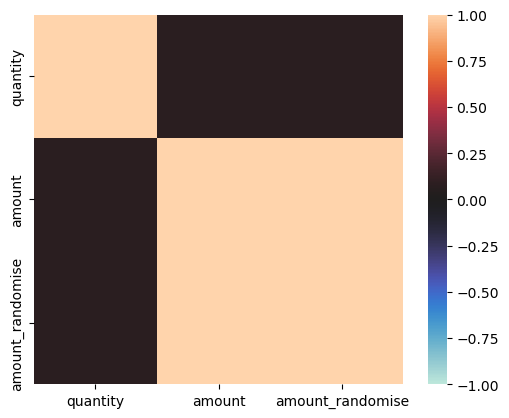

In [9]:
df_corr = df[["quantity", "amount", "amount_randomise"]].corr()
df_corr

sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, square=True)

# fig = go.Figure()
# fig.add_trace(
#     go.Heatmap(
#         x = df_corr.columns,
#         y = df_corr.index,
#         z = np.array(df_corr) 
#     )
# )

In [5]:
import plotly.figure_factory as ff
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()